<a href="https://colab.research.google.com/github/arindamkeswani/RePlicate/blob/main/RePlicator_(HPC_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description:
RePlicator (Relative Plagiarism Indicator) is a plagiarism detector meant to reduce the time taken to calculate level of plagiarism of a document with all the others in a dataset by using concepts of data-parallelism and libraries that work on similar principles


---



Observations and assumptions so far:
1. Since an online plag checker would work on a cloud platform, we abandoned local testing in favour of a platform like Colab, as that would give results that are more realistic
2. Major tests done include comparing the execution time taken by:
  1. Serial implementation (for base time)
  2. Multiprocessing library (for base data-parallelism time)
  3. Psuedo data-parallelism (purely for research purposes)
  4. Numba library (for potential in-built optimum time)

3. Other libraries, such as iparallel are performing worse than expected, and worse than serial implementation, so they were left out of the final analysis

4. Numba gives a significant improvement with caching.

5. Files will be fed as input to the program (to be serially or manually converted beforehand since this project focusses of parallel plagiarism, detection, not conversion)

6. Final output will consist of two parts from the perspective of:
 1. Product: Dataframe/spreadsheet type structure, showing level of plagiarism between files
 2. Reasearch: A time/speed-up based comparison between the aforementioned methodologies.

 Original outcome expected pure data-parallelism to perform better, but that is not the case, hence a black-box implemetation had to be adopted for successful completion.

6. Input iles are either in .pdf or .txt format

---

Implementation:
1. First part involves building the plag-checker and applying the various devised methodologies.
2. The next step is building a PDF-to-text converter. The goal is to build a simple converter but if time permits, it will be implemented in parallel. 
3. The aim of the project is to create the first two modules.
4. Since mid-eval: Tested for 50 files, and its time analysis. Added [Max plag value], [Max plag doc], [Average plag] columns to final output. Added multiprocessing file conversion successfully, and time comparison graphs.

In [ ]:
from google.colab import files 
uploaded = files.upload()

# **Module 1: Plag-checker**

In [33]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import time
import pandas as pd
from numba import jit
from numba import njit
# from numba.typed import List
from os import system
import sys
from numpy import dot #Alt for cosine similarity
from numpy.linalg import norm #Alt for cosine similarity

In [34]:
student_files = [doc for doc in os.listdir() if doc.endswith('.txt')] #store all text files
student_notes =[open(File).read() for File in  student_files] #stores all lines of all files

In [35]:
vectorize = lambda Text: TfidfVectorizer().fit_transform(Text).toarray()  #to vectorize the words of text files
# similarity = lambda doc1, doc2: cosine_similarity([doc1, doc2]) #to store similarity of two documents

In [36]:
vectors = vectorize(student_notes) #store vectorized values
s_vectors = list(zip(student_files, vectors)) #store it with file names
# plagiarism_results = set() #to store results in a set
plagiarism_results =[]
# s_vectors

In [37]:
def similarity(doc1, doc2):
  return cosine_similarity([doc1, doc2])

In [38]:
def check_plagiarism(s_vectors_partial):
    # similarity = lambda doc1, doc2: cosine_similarity([doc1, doc2]) #to store similarity of two documents
    plagiarism_results =[]
    
    sys.stdout.write("\r"+"Starting process...")
    global s_vectors
    for student_a, text_vector_a in s_vectors_partial:  #traverse through students and their vectors (for first document)
        # print(f"Started testing:{student_a}")
        # print("Started testing:",student_a)
        sys.stdout.write("\r"+"Started testing:"+student_a) # Cursor up one line
        # time.sleep(1)
        new_vectors = s_vectors.copy() 
        
        # current_index = new_vectors.index((student_a, text_vector_a))
        # del new_vectors[current_index]
        

        for student_b , text_vector_b in new_vectors: #traverse through students and their vectors (for second document)
            # print(f"Testing {student_a} against {student_b}")
            # print("Testing",student_a,"against",student_b)
            sys.stdout.write("\r"+"Testing: "+student_a+" | Against: "+student_b) # Cursor up one line
            # time.sleep(1)
            # sim_score = similarity(text_vector_a, text_vector_b)[0][1] #calculate similarity of both documents
            sim_score = dot(text_vector_a, text_vector_b)/(norm(text_vector_a)*norm(text_vector_b))
            # sim_score = cosine_similarity([text_vector_a, text_vector_b])[0][1]#########################Uncomment it later
            # student_pair = sorted((student_a, student_b)) 
            student_pair = (student_a, student_b) 
            # score = (student_pair[0], student_pair[1],sim_score)
            score = [student_pair[0], student_pair[1],sim_score]
            # plagiarism_results.add(score) #add score with file names into the set
            plagiarism_results.append(score)
            # print("Finished testing",student_a,"against",student_b)
        sys.stdout.write("\r"+"Finished testing: "+student_a)
        sys.stdout.write("\r")
        # print()
    sys.stdout.write("\r"+"Testing complete!")
    return plagiarism_results  
    # return createTable(plagiarism_results)

def createTable(ans):
    df=pd.DataFrame(np.zeros((len(student_files),len(student_files))),index=student_files,columns=student_files)

    for data in ans:
      for rowName in range(len(student_files)):
        if df.index[rowName]==data[0]:
          r=rowName
          for colName in range(len(student_files)):
            if df.index[colName]==data[1]:
              c=colName

              df.iloc[r,c] = data[2]
    return df

In [39]:
#Serial
%%time
start=time.time()
ans=check_plagiarism(s_vectors)
# df=createTable(ans)

end=time.time()
print()
print("Time taken:", end-start)

Testing complete!
Time taken: 0.5640766620635986
CPU times: user 576 ms, sys: 448 ms, total: 1.02 s
Wall time: 564 ms


In [40]:
df=createTable(ans)
df

,Sports4.txt,Sports2.txt,Shake2.txt,Sports10.txt,john.txt,Shake10.txt,Sports5.txt,Stars3.txt,Foucault6.txt,Shake3.txt,Foucault5.txt,Shake5.txt,Foucault3.txt,Shake9.txt,Shake1.txt,Sports8.txt,Sports7.txt,Foucault8.txt,Shake7.txt,fatma.txt,Foucault2.txt,Stars2.txt,Stars6.txt,Sports9.txt,juma.txt,Sports6.txt,Stars1.txt,Shake6.txt,Web3.txt,PatFem3.txt,PatFem1.txt,Sports1.txt,Foucault1.txt,Web1.txt,PatFem4.txt,Capitalism.txt,Stars4.txt,Shake8.txt,Sports3.txt,Shake4.txt,Cloud3(Lang).txt,Gender1.txt,ML2.txt,Foucault4.txt,Foucault7.txt,Cloud1.txt,Cloud2.txt,ML1.txt
Sports4.txt,1.000000,0.540590,0.549431,0.007700,0.074829,0.513407,0.456015,0.055354,0.439530,0.290810,0.565073,0.532471,0.587642,0.373824,0.278882,0.000516,0.000000,0.508689,0.459812,0.209889,0.611412,0.058169,0.086726,0.289265,0.161171,0.169000,0.045524,0.383894,0.005773,0.070779,0.554935,0.451914,0.544490,0.045925,0.581316,0.508450,0.167367,0.373766,0.012399,0.426880,0.047800,0.523256,0.024552,0.417975,0.570339,0.012584,0.454971,0.495005
Sports2.txt,0.540590,1.000000,0.607730,0.011645,0.060536,0.497583,0.503942,0.055869,0.431098,0.286696,0.623282,0.576689,0.655093,0.378299,0.279663,0.008055,0.011016,0.540761,0.473934,0.149043,0.642969,0.045975,0.070072,0.193740,0.121459,0.203994,0.042719,0.400835,0.003794,0.097238,0.569895,0.513005,0.579114,0.037033,0.587094,0.558293,0.143447,0.377291,0.012520,0.439976,0.039600,0.544250,0.023128,0.437656,0.627715,0.010183,0.483487,0.535105
Shake2.txt,0.549431,0.607730,1.000000,0.008886,0.054514,0.594034,0.515624,0.061436,0.475010,0.286005,0.674206,0.781810,0.728053,0.464198,0.467459,0.002654,0.000174,0.583814,0.580623,0.148580,0.725657,0.049421,0.078888,0.169296,0.103100,0.141970,0.047658,0.612476,0.005491,0.112976,0.639062,0.497601,0.630432,0.048398,0.647520,0.623488,0.166062,0.461508,0.014600,0.603218,0.050558,0.596584,0.025214,0.450682,0.696785,0.010408,0.515155,0.561819
Sports10.txt,0.007700,0.011645,0.008886,1.000000,0.000389,0.005854,0.007512,0.000623,0.005985,0.002883,0.008705,0.007864,0.009559,0.005190,0.007824,0.003595,0.224074,0.007516,0.006168,0.001363,0.008771,0.000788,0.001110,0.007018,0.000936,0.010515,0.000500,0.004852,0.000000,0.001585,0.007437,0.010034,0.009052,0.001566,0.007668,0.007646,0.001710,0.005057,0.474737,0.006344,0.003718,0.006788,0.000182,0.005734,0.008699,0.000082,0.006292,0.006925
john.txt,0.074829,0.060536,0.054514,0.000389,1.000000,0.059584,0.063640,0.011566,0.090941,0.050288,0.057361,0.049219,0.090778,0.077155,0.031050,0.000000,0.000000,0.077321,0.045030,0.129807,0.086062,0.014234,0.013255,0.023821,0.652221,0.024481,0.006441,0.026948,0.003218,0.000000,0.065811,0.044473,0.078992,0.003369,0.070626,0.065957,0.020806,0.077208,0.004547,0.046037,0.002929,0.045262,0.003570,0.038809,0.078099,0.000900,0.099638,0.050382
Shake10.txt,0.513407,0.497583,0.594034,0.005854,0.059584,1.000000,0.396788,0.056470,0.367640,0.301730,0.523496,0.557987,0.547253,0.557625,0.331373,0.000457,0.003127,0.471322,0.445321,0.208720,0.561426,0.060466,0.081996,0.192594,0.146300,0.137537,0.051990,0.448873,0.006365,0.074785,0.496491,0.437563,0.485175,0.043581,0.512285,0.475251,0.146848,0.577127,0.012106,0.562027,0.051256,0.459652,0.029211,0.374442,0.538303,0.008591,0.431451,0.470022
Sports5.txt,0.456015,0.503942,0.515624,0.007512,0.063640,0.396788,1.000000,0.049708,0.362441,0.209595,0.567780,0.504795,0.580910,0.286450,0.241529,0.000227,0.000281,0.447005,0.392947,0.099435,0.555139,0.033452,0.068511,0.148589,0.095524,0.116887,0.037058,0.319687,0.003976,0.100275,0.513305,0.435207,0.507786,0.031088,0.504179,0.482732,0.112422,0.286040,0.012964,0.391390,0.038791,0.491676,0.023371,0.349336,0.557161,0.009843,0.428021,0.482280
Stars3.txt,0.055354,0.055869,0.061436,0.000623,0.011566,0.056470,0.049708,1.000000,0.037457,0.036936,0.062232,0.054563,0.063879,0.053269,0.044760,0.000000,0.002373,0.061493,0.049123,0.012787,0.065875,0.347627,0.046736,0.018037,0.013662,0.025977,0.345957,0.041266,0.000137,0.007846,0.054686,0.047934,0.054352,0.007811,0.062845,0.052

In [41]:
df_res=pd.DataFrame()
df_res["Max plag value"]= df.apply(lambda row: row.nlargest(2).values[-1],axis=1)
df_res["Max plag doc"]= df.T.apply(lambda x: x.nlargest(2).idxmin())
df_res["Average plag"] = (df.sum(axis=1)-1) / (len(df)-1)
df_res

,Max plag value,Max plag doc,Average plag
Sports4.txt,0.611412,Foucault2.txt,0.309364
Sports2.txt,0.655093,Foucault3.txt,0.319853
Shake2.txt,0.781810,Shake5.txt,0.358942
Sports10.txt,0.474737,Sports3.txt,0.019980
john.txt,0.652221,juma.txt,0.056853
Shake10.txt,0.594034,Shake2.txt,0.304542
Sports5.txt,0.580910,Foucault3.txt,0.272836
Stars3.txt,0.347627,Stars2.txt,0.051850
Foucault6.txt,0.637492,Foucault2.txt,0.263069
Shake3.txt,0.316563,Foucault2.txt,0.166331




---

Parallel [Manual] approach

Ways to achieve data parallelism:
1. Divide s_vectors in parts (more likely)
2. Divide s_vectors[0][1] in parts (potential)

In [42]:
#Parallel [Manual] Part 1
%%time
start=time.time()
ans=check_plagiarism(s_vectors[:len(s_vectors)//2])

# for data in ans:
#     print(data)
# print(createTable(ans))
end=time.time()
print()
print("Time taken:", end-start)

Testing complete!
Time taken: 0.2880730628967285
CPU times: user 281 ms, sys: 221 ms, total: 502 ms
Wall time: 288 ms


In [43]:
dfm1=createTable(ans)
dfm1[:len(dfm1)//2][:]

,Sports4.txt,Sports2.txt,Shake2.txt,Sports10.txt,john.txt,Shake10.txt,Sports5.txt,Stars3.txt,Foucault6.txt,Shake3.txt,Foucault5.txt,Shake5.txt,Foucault3.txt,Shake9.txt,Shake1.txt,Sports8.txt,Sports7.txt,Foucault8.txt,Shake7.txt,fatma.txt,Foucault2.txt,Stars2.txt,Stars6.txt,Sports9.txt,juma.txt,Sports6.txt,Stars1.txt,Shake6.txt,Web3.txt,PatFem3.txt,PatFem1.txt,Sports1.txt,Foucault1.txt,Web1.txt,PatFem4.txt,Capitalism.txt,Stars4.txt,Shake8.txt,Sports3.txt,Shake4.txt,Cloud3(Lang).txt,Gender1.txt,ML2.txt,Foucault4.txt,Foucault7.txt,Cloud1.txt,Cloud2.txt,ML1.txt
Sports4.txt,1.000000,0.540590,0.549431,0.007700,0.074829,0.513407,0.456015,0.055354,0.439530,0.290810,0.565073,0.532471,0.587642,0.373824,0.278882,0.000516,0.000000,0.508689,0.459812,0.209889,0.611412,0.058169,0.086726,0.289265,0.161171,0.169000,0.045524,0.383894,0.005773,0.070779,0.554935,0.451914,0.544490,0.045925,0.581316,0.508450,0.167367,0.373766,0.012399,0.426880,0.047800,0.523256,0.024552,0.417975,0.570339,0.012584,0.454971,0.495005
Sports2.txt,0.540590,1.000000,0.607730,0.011645,0.060536,0.497583,0.503942,0.055869,0.431098,0.286696,0.623282,0.576689,0.655093,0.378299,0.279663,0.008055,0.011016,0.540761,0.473934,0.149043,0.642969,0.045975,0.070072,0.193740,0.121459,0.203994,0.042719,0.400835,0.003794,0.097238,0.569895,0.513005,0.579114,0.037033,0.587094,0.558293,0.143447,0.377291,0.012520,0.439976,0.039600,0.544250,0.023128,0.437656,0.627715,0.010183,0.483487,0.535105
Shake2.txt,0.549431,0.607730,1.000000,0.008886,0.054514,0.594034,0.515624,0.061436,0.475010,0.286005,0.674206,0.781810,0.728053,0.464198,0.467459,0.002654,0.000174,0.583814,0.580623,0.148580,0.725657,0.049421,0.078888,0.169296,0.103100,0.141970,0.047658,0.612476,0.005491,0.112976,0.639062,0.497601,0.630432,0.048398,0.647520,0.623488,0.166062,0.461508,0.014600,0.603218,0.050558,0.596584,0.025214,0.450682,0.696785,0.010408,0.515155,0.561819
Sports10.txt,0.007700,0.011645,0.008886,1.000000,0.000389,0.005854,0.007512,0.000623,0.005985,0.002883,0.008705,0.007864,0.009559,0.005190,0.007824,0.003595,0.224074,0.007516,0.006168,0.001363,0.008771,0.000788,0.001110,0.007018,0.000936,0.010515,0.000500,0.004852,0.000000,0.001585,0.007437,0.010034,0.009052,0.001566,0.007668,0.007646,0.001710,0.005057,0.474737,0.006344,0.003718,0.006788,0.000182,0.005734,0.008699,0.000082,0.006292,0.006925
john.txt,0.074829,0.060536,0.054514,0.000389,1.000000,0.059584,0.063640,0.011566,0.090941,0.050288,0.057361,0.049219,0.090778,0.077155,0.031050,0.000000,0.000000,0.077321,0.045030,0.129807,0.086062,0.014234,0.013255,0.023821,0.652221,0.024481,0.006441,0.026948,0.003218,0.000000,0.065811,0.044473,0.078992,0.003369,0.070626,0.065957,0.020806,0.077208,0.004547,0.046037,0.002929,0.045262,0.003570,0.038809,0.078099,0.000900,0.099638,0.050382
Shake10.txt,0.513407,0.497583,0.594034,0.005854,0.059584,1.000000,0.396788,0.056470,0.367640,0.301730,0.523496,0.557987,0.547253,0.557625,0.331373,0.000457,0.003127,0.471322,0.445321,0.208720,0.561426,0.060466,0.081996,0.192594,0.146300,0.137537,0.051990,0.448873,0.006365,0.074785,0.496491,0.437563,0.485175,0.043581,0.512285,0.475251,0.146848,0.577127,0.012106,0.562027,0.051256,0.459652,0.029211,0.374442,0.538303,0.008591,0.431451,0.470022
Sports5.txt,0.456015,0.503942,0.515624,0.007512,0.063640,0.396788,1.000000,0.049708,0.362441,0.209595,0.567780,0.504795,0.580910,0.286450,0.241529,0.000227,0.000281,0.447005,0.392947,0.099435,0.555139,0.033452,0.068511,0.148589,0.095524,0.116887,0.037058,0.319687,0.003976,0.100275,0.513305,0.435207,0.507786,0.031088,0.504179,0.482732,0.112422,0.286040,0.012964,0.391390,0.038791,0.491676,0.023371,0.349336,0.557161,0.009843,0.428021,0.482280
Stars3.txt,0.055354,0.055869,0.061436,0.000623,0.011566,0.056470,0.049708,1.000000,0.037457,0.036936,0.062232,0.054563,0.063879,0.053269,0.044760,0.000000,0.002373,0.061493,0.049123,0.012787,0.065875,0.347627,0.046736,0.018037,0.013662,0.025977,0.345957,0.041266,0.000137,0.007846,0.054686,0.047934,0.054352,0.007811,0.062845,0.052

In [44]:
#Parallel [Manual] Part 2
%%time
start=time.time()
ans=check_plagiarism(s_vectors[len(s_vectors)//2:])

# for data in ans:
#     print(data)
# print(createTable(ans))
end=time.time()
print()
print("Time taken:", end-start)

Testing complete!
Time taken: 0.28000354766845703
CPU times: user 290 ms, sys: 221 ms, total: 512 ms
Wall time: 280 ms


In [45]:
dfm2=createTable(ans)
dfm2[len(dfm1)//2:][:]

,Sports4.txt,Sports2.txt,Shake2.txt,Sports10.txt,john.txt,Shake10.txt,Sports5.txt,Stars3.txt,Foucault6.txt,Shake3.txt,Foucault5.txt,Shake5.txt,Foucault3.txt,Shake9.txt,Shake1.txt,Sports8.txt,Sports7.txt,Foucault8.txt,Shake7.txt,fatma.txt,Foucault2.txt,Stars2.txt,Stars6.txt,Sports9.txt,juma.txt,Sports6.txt,Stars1.txt,Shake6.txt,Web3.txt,PatFem3.txt,PatFem1.txt,Sports1.txt,Foucault1.txt,Web1.txt,PatFem4.txt,Capitalism.txt,Stars4.txt,Shake8.txt,Sports3.txt,Shake4.txt,Cloud3(Lang).txt,Gender1.txt,ML2.txt,Foucault4.txt,Foucault7.txt,Cloud1.txt,Cloud2.txt,ML1.txt
juma.txt,0.161171,0.121459,0.103100,0.000936,0.652221,0.146300,0.095524,0.013662,0.164045,0.102579,0.124822,0.094330,0.142888,0.140405,0.049381,0.000000,0.000000,0.141992,0.109383,0.165593,0.144538,0.015381,0.015379,0.073984,1.000000,0.024853,0.006960,0.085770,0.000000,0.000000,0.113514,0.087455,0.156690,0.006722,0.128655,0.118881,0.031591,0.138495,0.005594,0.093527,0.010670,0.073643,0.008267,0.083284,0.124653,0.001921,0.105370,0.097912
Sports6.txt,0.169000,0.203994,0.141970,0.010515,0.024481,0.137537,0.116887,0.025977,0.092866,0.076157,0.110148,0.133000,0.151297,0.123839,0.089188,0.000000,0.000000,0.146189,0.107568,0.044340,0.161759,0.036619,0.033532,0.162345,0.024853,1.000000,0.029390,0.088481,0.001970,0.015623,0.118387,0.194620,0.122746,0.010436,0.133018,0.121545,0.048947,0.145779,0.004192,0.114932,0.013796,0.110940,0.009285,0.112793,0.148676,0.002267,0.123799,0.118294
Stars1.txt,0.045524,0.042719,0.047658,0.000500,0.006441,0.051990,0.037058,0.345957,0.026364,0.028426,0.044847,0.044328,0.049822,0.052073,0.035669,0.000000,0.000000,0.053388,0.040992,0.012610,0.051283,0.346704,0.074434,0.015715,0.006960,0.029390,1.000000,0.030485,0.000368,0.008483,0.042830,0.037462,0.042757,0.008135,0.045469,0.042289,0.027969,0.054731,0.004032,0.037761,0.008832,0.046797,0.028966,0.039231,0.050272,0.001046,0.049528,0.043899
Shake6.txt,0.383894,0.400835,0.612476,0.004852,0.026948,0.448873,0.319687,0.041266,0.332339,0.226560,0.441668,0.561153,0.453406,0.350406,0.375286,0.000000,0.000000,0.370053,0.430382,0.113349,0.474931,0.029482,0.048243,0.115126,0.085770,0.088481,0.030485,1.000000,0.004207,0.060488,0.418465,0.331078,0.414177,0.029792,0.412090,0.410257,0.123127,0.356852,0.009580,0.447471,0.034511,0.384766,0.016261,0.297265,0.437536,0.006176,0.324368,0.361057
Web3.txt,0.005773,0.003794,0.005491,0.000000,0.003218,0.006365,0.003976,0.000137,0.004952,0.000913,0.005739,0.006067,0.005162,0.003538,0.007584,0.000000,0.003959,0.004557,0.004996,0.007515,0.007313,0.000733,0.002414,0.004838,0.000000,0.001970,0.000368,0.004207,1.000000,0.000000,0.006134,0.003899,0.004352,0.010827,0.005671,0.004656,0.001700,0.003496,0.000000,0.005271,0.009445,0.005571,0.000699,0.003938,0.004657,0.000679,0.005451,0.005738
PatFem3.txt,0.070779,0.097238,0.112976,0.001585,0.000000,0.074785,0.100275,0.007846,0.069529,0.029569,0.113577,0.109463,0.130040,0.056802,0.046721,0.000000,0.000000,0.086936,0.072484,0.000000,0.116575,0.006023,0.005317,0.013613,0.000000,0.015623,0.008483,0.060488,0.000000,1.000000,0.107500,0.117856,0.106611,0.006844,0.100066,0.104228,0.024989,0.055908,0.002043,0.083905,0.005328,0.100783,0.002183,0.072898,0.123360,0.001165,0.078744,0.096766
PatFem1.txt,0.554935,0.569895,0.639062,0.007437,0.065811,0.496491,0.513305,0.054686,0.464194,0.285184,0.659632,0.636430,0.694677,0.380110,0.312459,0.000314,0.000000,0.560550,0.512914,0.150836,0.696201,0.039884,0.078885,0.150932,0.113514,0.118387,0.042830,0.418465,0.006134,0.107500,1.000000,0.474455,0.600718,0.046394,0.658185,0.585582,0.201493,0.375518,0.013568,0.488257,0.047815,0.650991,0.024539,0.426277,0.671511,0.009577,0.495836,0.542658
Sports1.txt,0.451914,0.513005,0.497601,0.010034,0.044473,0.437563,0.435207,0.047934,0.332204,0.240340,0.522450,0.477240,0.526276,0.329072,0.231197,0.003642,0.000000,0.423933,0.372673,0.129599,0.524914,0.042228,0.053753,0.206099,0.087455,0.194620,0.037462,0.331078,0.003899,0.117856,0.474455,1.000000,0.463740,0.042505,0.469627,0.444422,



---





---

Multiprocessing approach

In [ ]:
# s_vectors[:len(s_vectors)//2]

In [46]:
#Multiprocessing approach
%%time
import multiprocessing
import os

# def worker1(func1): 
#   func1(m)
  

start=time.time()

pool = multiprocessing.Pool(processes=2) 



l1 = s_vectors[:len(s_vectors)//2]
l2 = s_vectors[len(s_vectors)//2:]

start=time.time()

result = pool.map(check_plagiarism, [l1,l2])

# for i in result:
#   print(i)

# print(createTable(result))
# print(result)

end=time.time()

# ty.append("Multiprocessing [50000 elements]")
# t.append(end-start)

print("Time taken: ",end-start)

Time taken:  0.29589200019836426
CPU times: user 26.1 ms, sys: 46.1 ms, total: 72.2 ms
Wall time: 316 ms




---

Numba approach

In [47]:
#Numba approach
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

In [58]:
%%time
start=time.time()
# try:

num_res= jit(parallel=True,forceobj=True)(check_plagiarism)


end=time.time()


CPU times: user 308 µs, sys: 49 µs, total: 357 µs
Wall time: 363 µs


In [61]:
%%time
a=num_res(s_vectors)

Testing complete!CPU times: user 553 ms, sys: 418 ms, total: 971 ms
Wall time: 551 ms


In [62]:
df2=createTable(a)
df2

,Sports4.txt,Sports2.txt,Shake2.txt,Sports10.txt,john.txt,Shake10.txt,Sports5.txt,Stars3.txt,Foucault6.txt,Shake3.txt,Foucault5.txt,Shake5.txt,Foucault3.txt,Shake9.txt,Shake1.txt,Sports8.txt,Sports7.txt,Foucault8.txt,Shake7.txt,fatma.txt,Foucault2.txt,Stars2.txt,Stars6.txt,Sports9.txt,juma.txt,Sports6.txt,Stars1.txt,Shake6.txt,Web3.txt,PatFem3.txt,PatFem1.txt,Sports1.txt,Foucault1.txt,Web1.txt,PatFem4.txt,Capitalism.txt,Stars4.txt,Shake8.txt,Sports3.txt,Shake4.txt,Cloud3(Lang).txt,Gender1.txt,ML2.txt,Foucault4.txt,Foucault7.txt,Cloud1.txt,Cloud2.txt,ML1.txt
Sports4.txt,1.000000,0.540590,0.549431,0.007700,0.074829,0.513407,0.456015,0.055354,0.439530,0.290810,0.565073,0.532471,0.587642,0.373824,0.278882,0.000516,0.000000,0.508689,0.459812,0.209889,0.611412,0.058169,0.086726,0.289265,0.161171,0.169000,0.045524,0.383894,0.005773,0.070779,0.554935,0.451914,0.544490,0.045925,0.581316,0.508450,0.167367,0.373766,0.012399,0.426880,0.047800,0.523256,0.024552,0.417975,0.570339,0.012584,0.454971,0.495005
Sports2.txt,0.540590,1.000000,0.607730,0.011645,0.060536,0.497583,0.503942,0.055869,0.431098,0.286696,0.623282,0.576689,0.655093,0.378299,0.279663,0.008055,0.011016,0.540761,0.473934,0.149043,0.642969,0.045975,0.070072,0.193740,0.121459,0.203994,0.042719,0.400835,0.003794,0.097238,0.569895,0.513005,0.579114,0.037033,0.587094,0.558293,0.143447,0.377291,0.012520,0.439976,0.039600,0.544250,0.023128,0.437656,0.627715,0.010183,0.483487,0.535105
Shake2.txt,0.549431,0.607730,1.000000,0.008886,0.054514,0.594034,0.515624,0.061436,0.475010,0.286005,0.674206,0.781810,0.728053,0.464198,0.467459,0.002654,0.000174,0.583814,0.580623,0.148580,0.725657,0.049421,0.078888,0.169296,0.103100,0.141970,0.047658,0.612476,0.005491,0.112976,0.639062,0.497601,0.630432,0.048398,0.647520,0.623488,0.166062,0.461508,0.014600,0.603218,0.050558,0.596584,0.025214,0.450682,0.696785,0.010408,0.515155,0.561819
Sports10.txt,0.007700,0.011645,0.008886,1.000000,0.000389,0.005854,0.007512,0.000623,0.005985,0.002883,0.008705,0.007864,0.009559,0.005190,0.007824,0.003595,0.224074,0.007516,0.006168,0.001363,0.008771,0.000788,0.001110,0.007018,0.000936,0.010515,0.000500,0.004852,0.000000,0.001585,0.007437,0.010034,0.009052,0.001566,0.007668,0.007646,0.001710,0.005057,0.474737,0.006344,0.003718,0.006788,0.000182,0.005734,0.008699,0.000082,0.006292,0.006925
john.txt,0.074829,0.060536,0.054514,0.000389,1.000000,0.059584,0.063640,0.011566,0.090941,0.050288,0.057361,0.049219,0.090778,0.077155,0.031050,0.000000,0.000000,0.077321,0.045030,0.129807,0.086062,0.014234,0.013255,0.023821,0.652221,0.024481,0.006441,0.026948,0.003218,0.000000,0.065811,0.044473,0.078992,0.003369,0.070626,0.065957,0.020806,0.077208,0.004547,0.046037,0.002929,0.045262,0.003570,0.038809,0.078099,0.000900,0.099638,0.050382
Shake10.txt,0.513407,0.497583,0.594034,0.005854,0.059584,1.000000,0.396788,0.056470,0.367640,0.301730,0.523496,0.557987,0.547253,0.557625,0.331373,0.000457,0.003127,0.471322,0.445321,0.208720,0.561426,0.060466,0.081996,0.192594,0.146300,0.137537,0.051990,0.448873,0.006365,0.074785,0.496491,0.437563,0.485175,0.043581,0.512285,0.475251,0.146848,0.577127,0.012106,0.562027,0.051256,0.459652,0.029211,0.374442,0.538303,0.008591,0.431451,0.470022
Sports5.txt,0.456015,0.503942,0.515624,0.007512,0.063640,0.396788,1.000000,0.049708,0.362441,0.209595,0.567780,0.504795,0.580910,0.286450,0.241529,0.000227,0.000281,0.447005,0.392947,0.099435,0.555139,0.033452,0.068511,0.148589,0.095524,0.116887,0.037058,0.319687,0.003976,0.100275,0.513305,0.435207,0.507786,0.031088,0.504179,0.482732,0.112422,0.286040,0.012964,0.391390,0.038791,0.491676,0.023371,0.349336,0.557161,0.009843,0.428021,0.482280
Stars3.txt,0.055354,0.055869,0.061436,0.000623,0.011566,0.056470,0.049708,1.000000,0.037457,0.036936,0.062232,0.054563,0.063879,0.053269,0.044760,0.000000,0.002373,0.061493,0.049123,0.012787,0.065875,0.347627,0.046736,0.018037,0.013662,0.025977,0.345957,0.041266,0.000137,0.007846,0.054686,0.047934,0.054352,0.007811,0.062845,0.052

In [63]:
df_res2=pd.DataFrame()
df_res2["Max plag value"]= df2.apply(lambda row: row.nlargest(2).values[-1],axis=1)
df_res2["Max plag doc"]= df2.T.apply(lambda x: x.nlargest(2).idxmin())
df_res2["Average plag"] = (df2.sum(axis=1)-1) / (len(df)-1)
df_res2

,Max plag value,Max plag doc,Average plag
Sports4.txt,0.611412,Foucault2.txt,0.309364
Sports2.txt,0.655093,Foucault3.txt,0.319853
Shake2.txt,0.781810,Shake5.txt,0.358942
Sports10.txt,0.474737,Sports3.txt,0.019980
john.txt,0.652221,juma.txt,0.056853
Shake10.txt,0.594034,Shake2.txt,0.304542
Sports5.txt,0.580910,Foucault3.txt,0.272836
Stars3.txt,0.347627,Stars2.txt,0.051850
Foucault6.txt,0.637492,Foucault2.txt,0.263069
Shake3.txt,0.316563,Foucault2.txt,0.166331




---

# **Results**

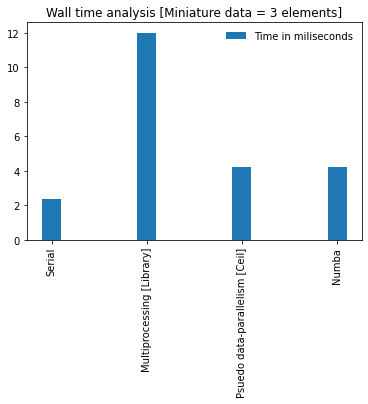

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t=[2.35, 12.0, 4.19 , 4.22]
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]
nodes= np.arange(len(t))

plt.bar(nodes,t,width=0.2, align='center' ,label='Time in miliseconds')

plt.title("Wall time analysis [Miniature data = 3 elements]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

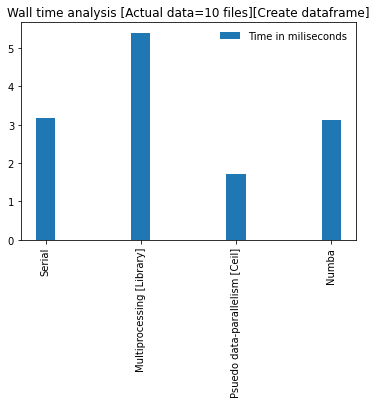

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t=[3.18 , 5.4, 1.71 , 3.13]
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]
nodes= np.arange(len(t))

plt.bar(nodes,t,width=0.2, align='center' ,label='Time in miliseconds')

plt.title("Wall time analysis [Actual data=10 files][Create dataframe]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

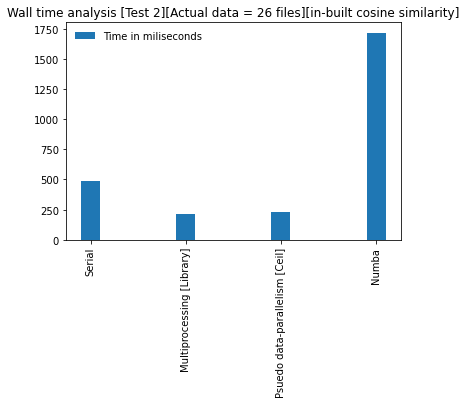

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t=[485 , 212, 233 ,1720]
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]
nodes= np.arange(len(t))


plt.bar(nodes,t,width=0.2, align='center' ,label='Time in miliseconds')

plt.title("Wall time analysis [Test 2][Actual data = 26 files][in-built cosine similarity]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

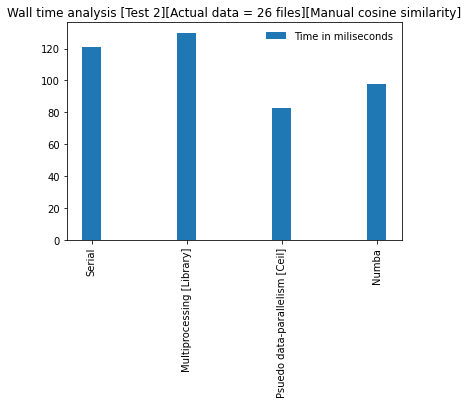

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t=[121 , 130, 82.9 ,97.5]
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]
nodes= np.arange(len(t))

plt.bar(nodes,t,width=0.2, align='center' ,label='Time in miliseconds')

plt.title("Wall time analysis [Test 2][Actual data = 26 files][Manual cosine similarity]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

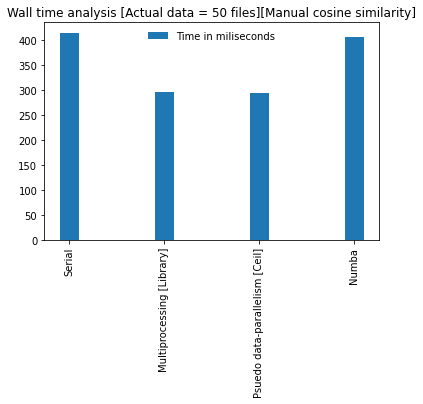

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t=[414 , 295, 292.9 ,405]
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]
nodes= np.arange(len(t))

plt.bar(nodes,t,width=0.2, align='center' ,label='Time in miliseconds')

plt.title("Wall time analysis [Actual data = 50 files][Manual cosine similarity]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

# **Module 2: PDF-to-text converter**

In [ ]:
pip install PyPDF2

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Capitalism.pdf to Capitalism.pdf
Saving Cloud1.pdf to Cloud1.pdf
Saving Cloud2.pdf to Cloud2.pdf
Saving Cloud3(Lang).pdf to Cloud3(Lang).pdf
Saving fatma.txt to fatma.txt
Saving Foucault1.pdf to Foucault1.pdf
Saving Foucault2.pdf to Foucault2.pdf
Saving Foucault3.pdf to Foucault3.pdf
Saving Foucault4.pdf to Foucault4.pdf
Saving Foucault5.pdf to Foucault5.pdf
Saving Foucault6.pdf to Foucault6.pdf
Saving Foucault7.pdf to Foucault7.pdf
Saving Foucault8.pdf to Foucault8.pdf
Saving Gender1.pdf to Gender1.pdf
Saving john.txt to john.txt
Saving juma.txt to juma.txt
Saving ML1.pdf to ML1.pdf
Saving ML2.pdf to ML2.pdf
Saving PatFem1.txt to PatFem1.txt
Saving PatFem3.pdf to PatFem3.pdf
Saving PatFem4.pdf to PatFem4.pdf
Saving Shake1.pdf to Shake1.pdf
Saving Shake2.pdf to Shake2.pdf
Saving Shake3.pdf to Shake3.pdf
Saving Shake4.pdf to Shake4.pdf
Saving Shake5.pdf to Shake5.pdf
Saving Shake6.pdf to Shake6.pdf
Saving Shake7.pdf to Shake7.pdf
Saving Shake8.pdf to Shake8.pdf
Saving Shake9.pdf 

In [ ]:
# importing required modules 
import PyPDF2 

In [ ]:
student_files_pdf = [doc for doc in os.listdir() if doc.endswith('.pdf')]
student_files_pdf

['Sports10.pdf',
 'Stars4.pdf',
 'Sports2.pdf',
 'Shake5.pdf',
 'Cloud3(Lang).pdf',
 'Foucault1.pdf',
 'PatFem3.pdf',
 'ML1.pdf',
 'Shake9.pdf',
 'PatFem4.pdf',
 'Foucault4.pdf',
 'Sports4.pdf',
 'Foucault5.pdf',
 'Sports6.pdf',
 'Foucault2.pdf',
 'Cloud1.pdf',
 'Sports5.pdf',
 'Shake7.pdf',
 'Shake2.pdf',
 'Web2.pdf',
 'Shake3.pdf',
 'Foucault8.pdf',
 'Sports9.pdf',
 'Web3.pdf',
 'Shake8.pdf',
 'Cloud2.pdf',
 'Foucault3.pdf',
 'Sports1.pdf',
 'Shake4.pdf',
 'Web1.pdf',
 'Shake10.pdf',
 'Stars1.pdf',
 'Stars6.pdf',
 'Shake1.pdf',
 'Shake6.pdf',
 'Capitalism.pdf',
 'Foucault6.pdf',
 'Gender1.pdf',
 'Stars3.pdf',
 'Sports8.pdf',
 'ML2.pdf',
 'Stars2.pdf',
 'Sports7.pdf',
 'Sports3.pdf',
 'Foucault7.pdf',
 'Stars5.pdf']

In [ ]:
# creating a pdf file object 
def convert(path):

  pin='/content/'+path
  print(f"Converting {pin.split('/')[-1]}...")
  pout=pin[:-4]+".txt"
  print(pout)
  pdfFileObj = open(pin, 'rb') 
      
  # creating a pdf reader object 
  pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
      
  # printing number of pages in pdf file 
  print(f"Number of pages: {pdfReader.numPages}") 
      
  # creating a page object 
  s=""
  for i in range(pdfReader.numPages):
    pageObj = pdfReader.getPage(i) 
      
    # extracting text from page 
    s+=pageObj.extractText()
  print(f"Writing contents of {pin} to {pout}")
  myText = open(pout,'w')

  
  myText.write(s)
  myText.close()
  pdfFileObj.close()
  print('_'*100)

# closing the pdf file object 


In [ ]:
%%time
for i in student_files_pdf:
  try:
    path=i
    convert(i)
  except:
    print("Cannot convert",i)
    print('_'*100)

Converting Sports10.pdf...
/content/Sports10.txt
Number of pages: 6
Writing contents of /content/Sports10.pdf to /content/Sports10.txt
____________________________________________________________________________________________________
Converting Stars4.pdf...
/content/Stars4.txt
Number of pages: 3
Writing contents of /content/Stars4.pdf to /content/Stars4.txt
____________________________________________________________________________________________________
Converting Sports2.pdf...
/content/Sports2.txt
Number of pages: 8
Writing contents of /content/Sports2.pdf to /content/Sports2.txt
____________________________________________________________________________________________________
Converting Shake5.pdf...
/content/Shake5.txt
Number of pages: 3
Writing contents of /content/Shake5.pdf to /content/Shake5.txt
____________________________________________________________________________________________________
Converting Cloud3(Lang).pdf...
/content/Cloud3(Lang).txt
Number of pages: 39

Writing contents of /content/ML1.pdf to /content/ML1.txt
____________________________________________________________________________________________________
Converting Shake9.pdf...
/content/Shake9.txt
Number of pages: 3
Writing contents of /content/Shake9.pdf to /content/Shake9.txt
____________________________________________________________________________________________________
Converting PatFem4.pdf...
/content/PatFem4.txt
Number of pages: 20
Writing contents of /content/PatFem4.pdf to /content/PatFem4.txt
____________________________________________________________________________________________________
Converting Foucault4.pdf...
/content/Foucault4.txt
Number of pages: 10
Writing contents of /content/Foucault4.pdf to /content/Foucault4.txt
____________________________________________________________________________________________________
Converting Sports4.pdf...
/content/Sports4.txt
Number of pages: 2
Writing contents of /content/Sports4.pdf to /content/Sports4.txt
_________



---



In [ ]:
%%time
#Multiprocessing approach
# creating a pdf file object 
def convert2(student_files_pdf):
  for i in student_files_pdf:
    try:
      path=i
      pin='/content/'+path
      print(f"Converting {pin.split('/')[-1]}...")
      pout=pin[:-4]+".txt"
      print(pout)
      pdfFileObj = open(pin, 'rb') 
          
      # creating a pdf reader object 
      pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
          
      # printing number of pages in pdf file 
      print(f"Number of pages: {pdfReader.numPages}") 
          
      # creating a page object 
      s=""
      for i in range(pdfReader.numPages):
        pageObj = pdfReader.getPage(i) 
          
        # extracting text from page 
        s+=pageObj.extractText()
      print(f"Writing contents of {pin} to {pout}")
      myText = open(pout,'w')

      
      myText.write(s)
      myText.close()
      pdfFileObj.close()
      print('_'*100)
    except:
      print("Cannot convert",i)
      print('_'*100)
  


In [ ]:
#Multiprocessing approach
%%time
import multiprocessing
import os

# def worker1(func1): 
#   func1(m)
  

start=time.time()

pool = multiprocessing.Pool(processes=2) 



l1 = student_files_pdf[:len(student_files_pdf)//2]
l2 = student_files_pdf[len(student_files_pdf)//2:]

start=time.time()

result = pool.map(convert2, [l1,l2])

for i in result:
  print(i)

# print(createTable(result))
# print(result)

end=time.time()

# ty.append("Multiprocessing [50000 elements]")
# t.append(end-start)

print("Time taken: ",end-start)



---





---
# **Final Results**


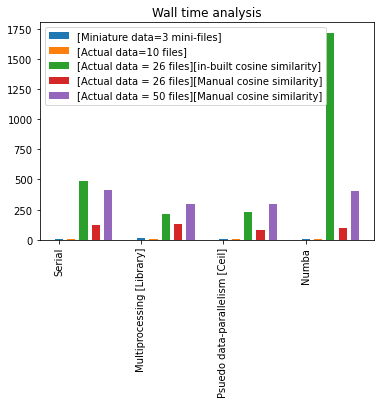

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


nodes= np.arange(len(t))
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]




t=[2.35, 12.0, 4.19 , 4.22]
plt.bar(nodes,t,width=0.1, align='center' ,label='[Miniature data=3 mini-files]')

t1=[3.18 , 5.4, 1.71 , 3.13]
plt.bar(nodes+0.15,t1,width=0.1, align='center' ,label='[Actual data=10 files]')

t2=[485 , 212, 233 ,1720]
plt.bar(nodes+0.3,t2,width=0.1, align='center' ,label='[Actual data = 26 files][in-built cosine similarity]')

t3=[121 , 130, 82.9 ,97.5]
plt.bar(nodes+0.45,t3,width=0.1, align='center' ,label='[Actual data = 26 files][Manual cosine similarity]')

t4=[414 , 295, 292.9 ,405]
plt.bar(nodes+0.6,t4,width=0.1, align='center' ,label='[Actual data = 50 files][Manual cosine similarity]')



plt.title("Wall time analysis")

plt.xticks(nodes,ty,rotation=90)

plt.legend(loc='best', frameon=True)
plt.show()

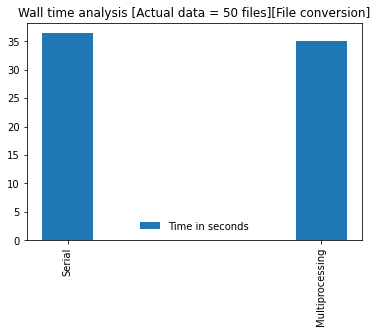

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t=[36.4 , 35]
ty=["Serial", "Multiprocessing"]
nodes= np.arange(len(t))

plt.bar(nodes,t,width=0.2, align='center' ,label='Time in seconds')

plt.title("Wall time analysis [Actual data = 50 files][File conversion]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()



---


# **Rough space**

In [ ]:
a=[1,2,5,3,4]
b=[1,2,4,5,6]
dot(a, b)/(norm(a)*norm(b))

In [ ]:
import sys
import time
for i in range(10):
    a="Loading" + "." * i
    sys.stdout.write("\r"+a) # Cursor up one line
    time.sleep(1)

Loading.........

In [ ]:
for data in ans:
  for rowName in range(len(student_files)):
    if df.index[rowName]==data[0]:
      r=rowName
      for colName in range(len(student_files)):
        if df.index[colName]==data[1]:
          c=colName

          df.iloc[r,c] = data[2]
df

In [ ]:
df=pd.DataFrame(np.zeros((len(student_files),len(student_files))),index=student_files,columns=student_files)
df

In [ ]:
df2=pd.DataFrame(np.zeros((len(student_files),len(student_files))),index=student_files,columns=student_files)
df2

,juma.txt,fatma.txt,john.txt
juma.txt,0.0,0.0,0.0
fatma.txt,0.0,0.0,0.0
john.txt,0.0,0.0,0.0


In [ ]:
for data in a:
  for rowName in range(len(student_files)):
    if df2.index[rowName]==data[0]:
      r=rowName
      for colName in range(len(student_files)):
        if df2.index[colName]==data[1]:
          c=colName

          df2.iloc[r,c] = data[2]
df2

,juma.txt,fatma.txt,john.txt
juma.txt,1.000000,0.186434,0.546597
fatma.txt,0.186434,1.000000,0.148069
john.txt,0.546597,0.148069,1.000000


In [ ]:
from numba import jit


def sq(n):
  s=0
  for i in range(n):
    s+=i**2
  print(s)


In [ ]:
%%time
sq(100000)

333328333350000
CPU times: user 30.7 ms, sys: 0 ns, total: 30.7 ms
Wall time: 31.5 ms


In [ ]:
from numba import jit

# @jit(nopython=True)
def sq2(n):
  s=0
  for i in range(n):
    s+=i**2
  print(s)


In [ ]:
%%time
ans=jit(nopython=True)(sq2)

CPU times: user 238 µs, sys: 28 µs, total: 266 µs
Wall time: 270 µs


In [ ]:
%%time 
ans(100000)

333328333350000
CPU times: user 138 µs, sys: 4 µs, total: 142 µs
Wall time: 101 µs
